# Importing Packages

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Loading Libraries
import math as mt
import numpy as np
import pandas as pd
import io
import scipy
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from plotnine import *
%matplotlib inline
import pandas_profiling
from scipy import stats
from math import sqrt
import sklearn as sk
from sklearn import preprocessing

#Estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel

#Model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#Cross Validation
from sklearn.model_selection import train_test_split

#For metrix rather than the accuracy:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

# Loading the data

We first load and check that the data has been correctly loaded:

In [3]:
credit = pd.read_csv('default of credit card clients.csv', header =1)
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## First impressions:

This dataset comes from Taiwan. This is important, as the credits in Taiwan have some peculiarities:
    
    · There's no minimum or maximum amount to pay each month. You can pay from 1 NT dollar to all the debt at your convenience.
    · Sometimes, the monthly pay that you make is not enough to cover the interests generated by the credit (The use of revolving credit).

The average value for the amount of credit card limit is 167,484. The standard deviation is unusually large, max value being 1M, while the min value being 10K.

Education level is mostly graduate school and university.

Most of the clients are either married or single (less frequent the other status).

Average age is 35.5 years, with a standard deviation of 9.2.

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

### **"New" values:**
· *EDUCATION:* 1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others.

· *MARRIAGE:* 1 = married; 2 = single; 3 = divorce; 0=others.

· *PAY_0 to PAY_6:* -2 = No consumption; -1= Paid in full; 0 = The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

# Data Exploration:

#### Looking for NA's:

In [4]:
# Redifining the "Default Payment" header:
credit.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment']

In [5]:
# Looking for NA's
total = credit.isnull().sum().sort_values(ascending = False)
percent = (credit.isnull().sum()/credit.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,default_payment,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are no NA's, so there's no need to treat them.

## Removing Duplicates:

In [6]:
new_credit = credit.drop_duplicates(subset= ('LIMIT_BAL',
 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
 'default_payment'), keep='first').reset_index(drop=True)
print("Number of observations:",len(new_credit.default_payment))

Number of observations: 29965


I've removed all duplicates, but there were only 35 rows duplicated out of 30K rows.

After removing the duplicates, we can now run a describing data report:

In [7]:
new_credit.profile_report()

· According to the correlation matrix plotted above, there are a high correlation between all "BILL_AMT" features, and the one that helps our model to predict the Default Payment better is the "BILL_AMT1".

· Features "PAY_AMT" are quite skewed, that means that they're not following a normal distribution. Many predictive models depend on normality assumptions.

· Again, we can see that the Default Payment is highly biased to "No". That means that we'll need to upsample or downsample the train set in order to avoid the model to predict "No" by default.

· I assume that some Feature Engineering will be needed, as it doesn't seems to be a strong correlation between any independent variables against the dependant one.

In [8]:
# Let's create some functions to Normalize and Standarize a vector of data
#input = array of values to be standardized
def standardize(lista = np.random.normal(loc=10, scale=20, size=1000)):
    stand_lista = np.ones(len(lista))
    for i in range(len(lista)):
        stand_lista[i] = (lista[i] - lista.mean())/(lista.var()**(1/2))
    return(stand_lista)

#input = array of values to be normalized
def normalize(lista = np.random.normal(loc=10, scale=20, size=1000)):
    norm_lista = np.ones(len(lista))
    for i in range(len(lista)):
        norm_lista[i] = (lista[i] - lista.min())/(lista.max() - lista.min())
    return(norm_lista)

# Plotting:

First of all, let's double check how skewed are the *PAY_AMT* features:

((array([-4.07374441, -3.86236132, -3.74689072, ...,  3.74689072,
          3.86236132,  4.07374441]),
  array([     0,      0,      0, ..., 443001, 527143, 528666])),
 (8917.826316445071, 5221.498014350078, 0.5013103757894165))

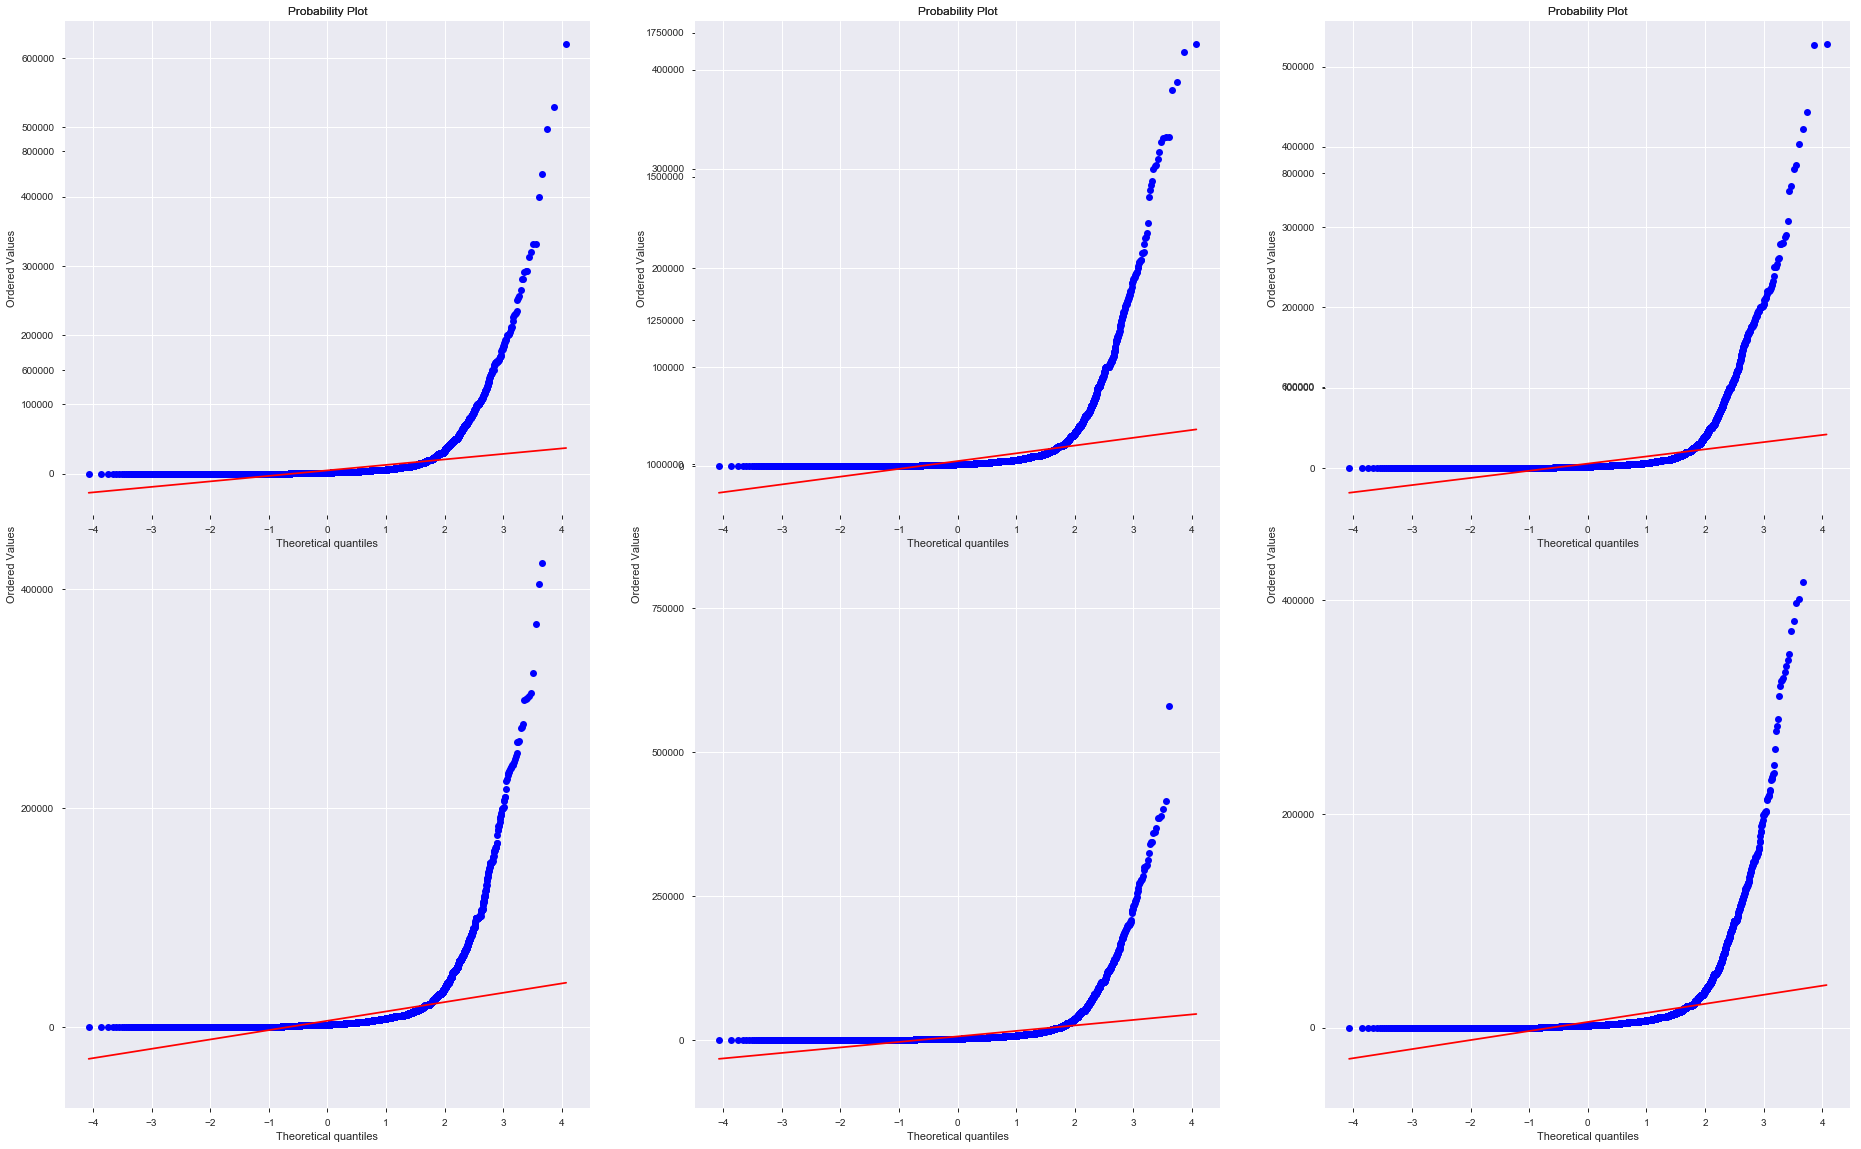

In [9]:
fig = plt.figure(figsize=(32, 20))
stats.probplot(new_credit.PAY_AMT1, plot=fig.add_subplot(131))
stats.probplot(new_credit.PAY_AMT2, plot=fig.add_subplot(132))
stats.probplot(new_credit.PAY_AMT3, plot=fig.add_subplot(133))
stats.probplot(new_credit.PAY_AMT4, plot=fig.add_subplot(231))
stats.probplot(new_credit.PAY_AMT5, plot=fig.add_subplot(232))
stats.probplot(new_credit.PAY_AMT6, plot=fig.add_subplot(233))

Now we can compare the Probability Plots of *PAY_AMT* variables with the ones for *AGE* and *LIMIT_BAL*:

((array([-4.07374441, -3.86236132, -3.74689072, ...,  3.74689072,
          3.86236132,  4.07374441]),
  array([  10000,   10000,   10000, ...,  800000,  800000, 1000000])),
 (123609.31740069685, 167442.00500584018, 0.9524885037122773))

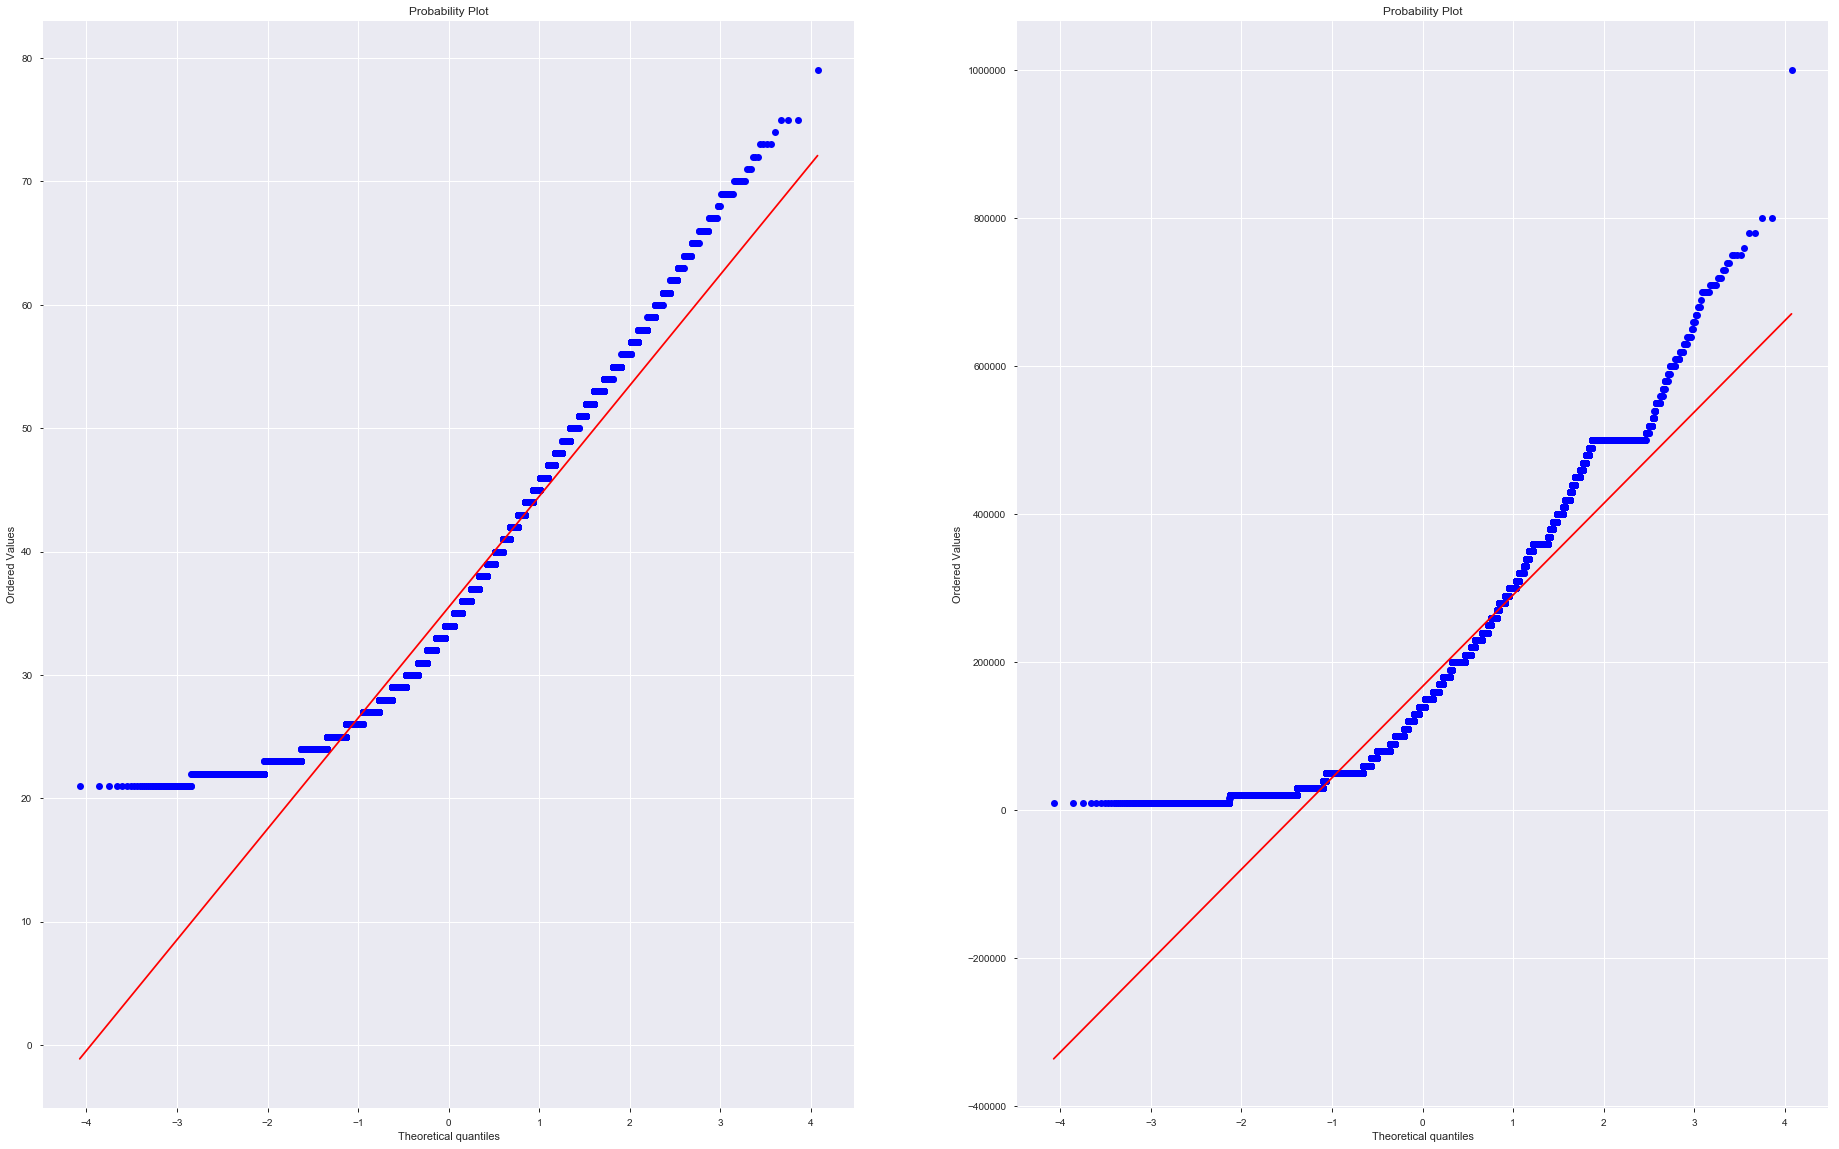

In [10]:
fig = plt.figure(figsize=(32, 20))
stats.probplot(new_credit.AGE, plot=fig.add_subplot(121))
stats.probplot(new_credit.LIMIT_BAL, plot=fig.add_subplot(122))

Let's have a quick check on the density plot for *LIMIT_BAL* feature:

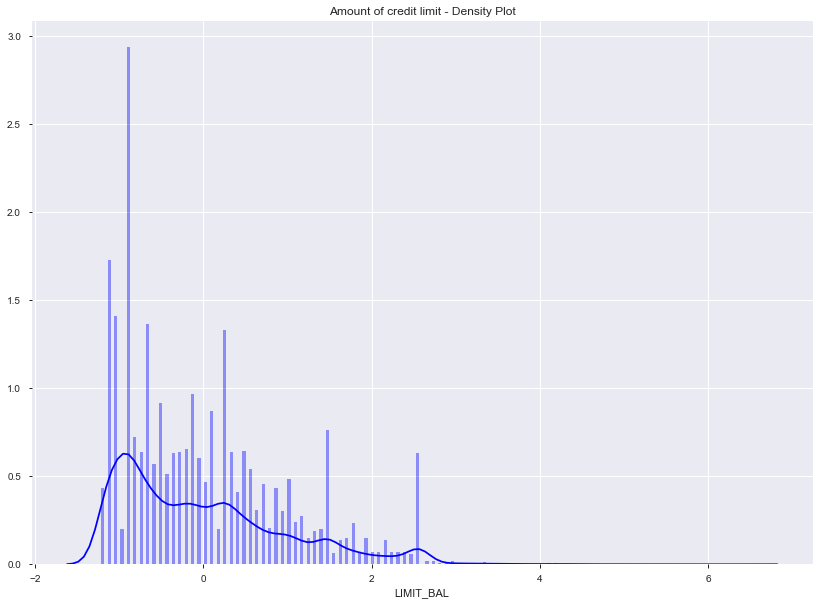

In [11]:
new_credit.LIMIT_BAL = standardize(new_credit.LIMIT_BAL)

#Plotting after Standardize
plt.figure(figsize = (14,10))
plt.title('Amount of credit limit - Density Plot')
sns.distplot(new_credit['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

After standardize the LIMIT_BAL feature, we observe that the shape hasn't change at all, but that we have rescaled the feature, from 10.000 to 1.000.000; to a new scale where the maximum will be 6.

The idea of standardize is to make all variables have similar units. It makes no sense to compare AGE and LIMIT_BAL without standardize them, as the scale is completely different.

In [12]:
# new_credit.SEX.replace([1,2],["Male","Female"],inplace=True)

# new_credit.EDUCATION.replace([0,1,2,3,4,5,6],
#                         ["Others","Graduate school","University","High school","Others","Others","Others"],
#                         inplace=True)

new_credit.EDUCATION.replace([0,1,2,3,4,5,6], [4,1,2,3,4,4,4], inplace=True)

# new_credit.MARRIAGE.replace([1,2,3,0], ["Married","Single","Divorced","Others"],inplace=True)

# new_credit.default_payment.replace([1,0],["Yes","No"],inplace=True)

#### Default Payment proportion:

We can observe that the vast majority of the clients will pay their loans, so it's really easy that the predictive model would tent to the "Not Default" rather than "Default" on their payments.

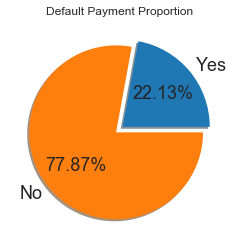

In [13]:
default = np.where(new_credit.default_payment == 1, "Yes", "No")

# Default payment pie chart
plt.pie([sum(default == "Yes"), sum(default == "No")], explode = [0.05, 0.05], autopct = '%1.2f%%', labels = ['Yes', 'No'], shadow = True, 
        textprops={'fontsize': 18})
plt.title("Default Payment Proportion")
plt.show()

#### Education vs. Default Payment:
At the below plot, we can face the *Default Payment* against the *Education* variables, so we can have an idea if there are relevant differences between the education level and the fact that the client will default or not.

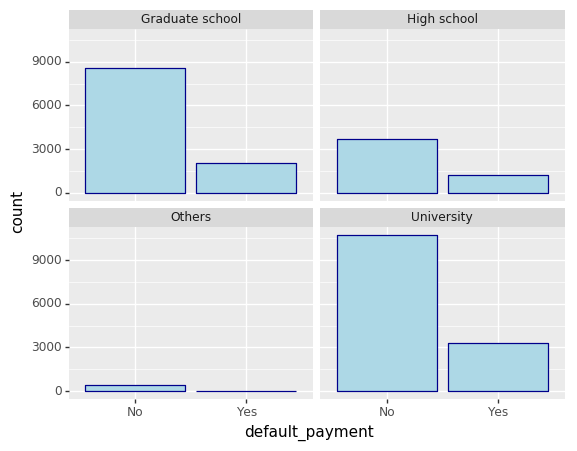

<ggplot: (-9223372029288958776)>

In [14]:
education = credit
education.EDUCATION.replace([0,1,2,3,4,5,6],
                            ["Others","Graduate school","University","High school","Others","Others","Others"]
                            ,inplace=True)
education.default_payment.replace([1,0],["Yes","No"],inplace=True)

(ggplot(education, aes(x="default_payment"))
+ geom_bar(color="darkblue", fill="lightblue") 
+ facet_wrap("EDUCATION"))

#### Age vs. Default Payment:

At the below plot, we can observe that there are no major differences between age ranges and the fact that the client will pay or default.

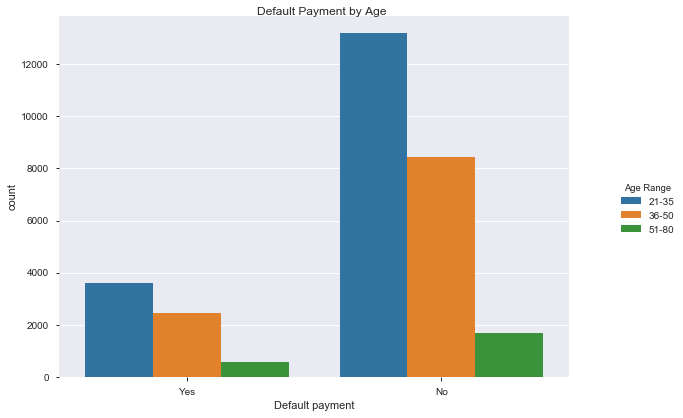

In [15]:
age = new_credit.AGE
ageConditions = [age <= 35, (age > 35) & (age <= 50), age > 50]
ageOptions = ["21-35", "36-50", "51-80"]
ageRange = np.select(ageConditions, ageOptions, default = '--')

defPayAge = pd.DataFrame({"Age Range" : ageRange, "Default payment" : default})

# Default payment by age range
defPayAgePlot = sns.catplot(data = defPayAge, x = "Default payment", kind = "count", hue = "Age Range")
defPayAgePlot.fig.suptitle("Default Payment by Age")
defPayAgePlot.fig.set_size_inches(10,6)
plt.show()

#### Age and Education vs. Default Payment:

Just putting the below graphs together, but there are nothing unexpected.

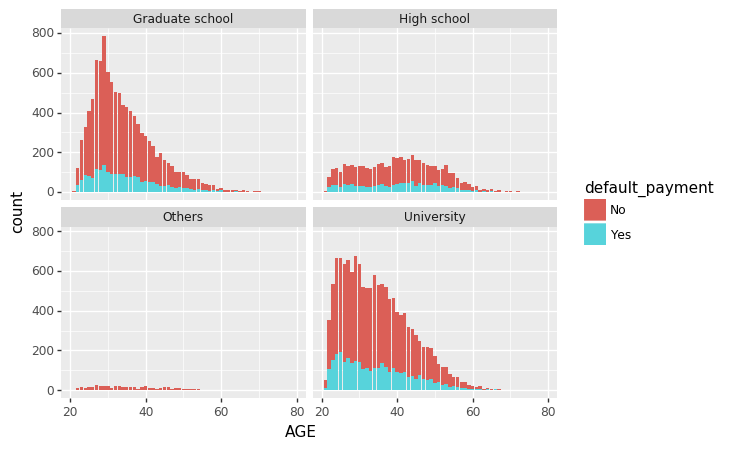

<ggplot: (-9223372029288860458)>

In [16]:
(ggplot(education, aes(x = "AGE", fill = "default_payment")) 
 + geom_bar() 
 + facet_wrap("EDUCATION"))

#### Marriage vs. Default Payment:

The vast majority of the clients are rather Single or Married

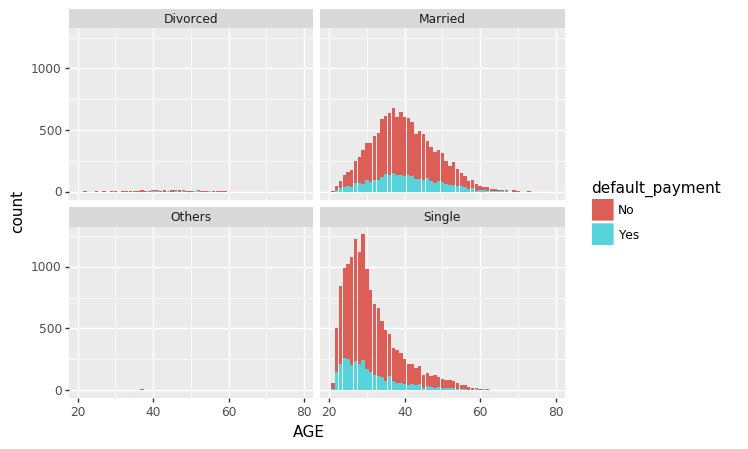

<ggplot: (-9223372029288886549)>

In [17]:
marriage = education
marriage.MARRIAGE.replace([1,2,3,0], ["Married","Single","Divorced","Others"],inplace=True)

(ggplot(marriage, aes(x = "AGE", fill = "default_payment")) 
 + geom_bar() 
 + facet_wrap("MARRIAGE"))

#### Male and Female distribution.

We can observe that there are around 50% more females rather than males. This means that there are around 3 females for every 2 males.

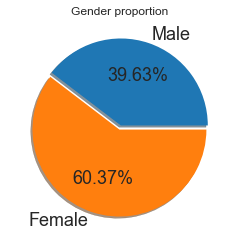

In [18]:
gender = np.where(new_credit.SEX == 1, "Male", "Female")

# Customer gender pie chart
plt.pie((sum(gender == "Male"), sum(gender == "Female")), explode = (0.05, 0), autopct='%1.2f%%', labels = ('Male', 'Female'), shadow = True, 
        textprops={'fontsize': 18})
plt.title("Gender proportion")
plt.show()

#### Age and sex vs. Default Payment:

We observe that there're a few more young females (below 30 years old) that are slightly more likely to default than males for the same age. But in general, the distribution looks quite similar. 

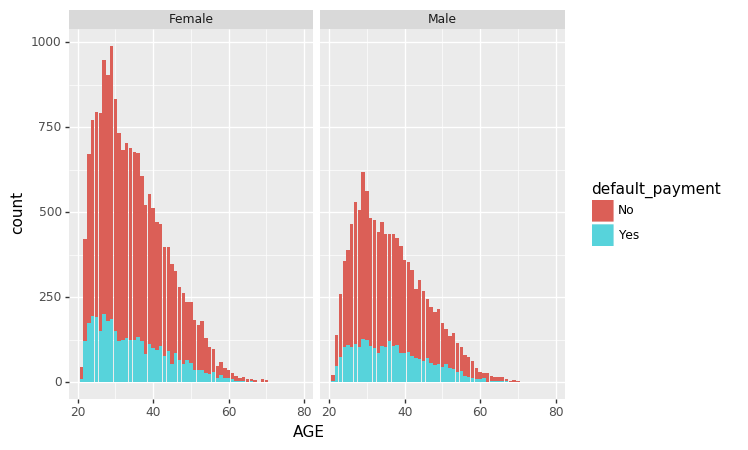

<ggplot: (-9223372029298596699)>

In [19]:
sex = marriage
sex.SEX.replace([1,2],["Male","Female"],inplace=True)

(ggplot(sex, aes(x = "AGE", fill = "default_payment")) 
 + geom_bar() 
 + facet_wrap("SEX"))

#### LIMIT_BAL boxplot:
We can observe that there are quite a few outliers regarding the feature *LIMIT_BAL*, but we'll need to check how important is this variable in order to take some action regarding those outliers.

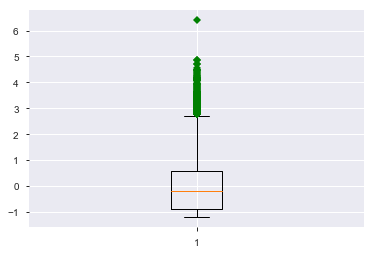

In [20]:
plt.boxplot(new_credit['LIMIT_BAL'], 0, 'gD')
plt.show()

#### Delay on payments:

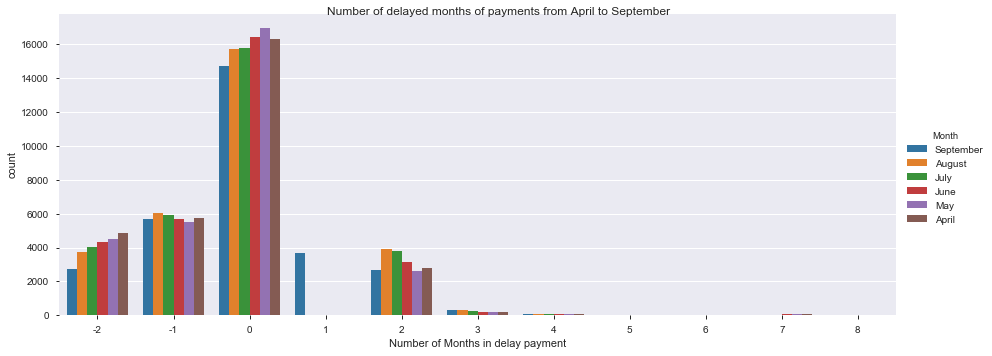

Number of Months in delay payment,-2,-1,0,1,2,3,4,5,6,7,8
Month,,,,,,,,,,,
April,4865.0,5736.0,16286.0,NaN,2766.0,184.0,48.0,13.0,19.0,46.0,2.0
August,3752.0,6046.0,15730.0,28.0,3926.0,326.0,99.0,25.0,12.0,20.0,1.0
July,4055.0,5934.0,15764.0,4.0,3819.0,240.0,75.0,21.0,23.0,27.0,3.0
June,4318.0,5683.0,16455.0,2.0,3159.0,180.0,68.0,35.0,5.0,58.0,2.0
May,4516.0,5535.0,16947.0,NaN,2626.0,178.0,83.0,17.0,4.0,58.0,1.0
September,2750.0,5682.0,14737.0,3667.0,2666.0,322.0,76.0,26.0,11.0,9.0,19.0


In [21]:
DelayedPay = new_credit.loc[:, 'PAY_0':'PAY_6']
DelayedPay = DelayedPay.melt(value_vars = DelayedPay.columns, var_name = 'Month',
                             value_name = 'Number of Months in delay payment')
month = DelayedPay['Month']
monthConditions = [month == 'PAY_0', month == 'PAY_2', month == 'PAY_3', 
                   month == 'PAY_4', month == 'PAY_5', month == 'PAY_6']
monthOptions = ['September', 'August', 'July', 'June', 'May', 'April']

month = np.select(monthConditions, monthOptions, default = '--')
DelayedPay['Month'] = month

DelayedPayPlot = sns.catplot(data = DelayedPay, x = 'Number of Months in delay payment', 
                           kind = 'count', hue = 'Month', aspect = 20/8)
DelayedPayPlot.fig.suptitle("Number of delayed months of payments from April to September")
plt.show()

DelayedPay.groupby('Month')['Number of Months in delay payment'].value_counts().unstack()

### Comments:
It's quite weird the fact that the only month that has a big amount of "one month delay" is September. We should expect that the number would be quite constant, as it is with two, three, four month delay...

This situation leads me to believe that there are some errors at the dataset, but unfortunately I can't get this missing data on a reliable way.

In [22]:
# Prerpocessing: Standardize the remaining data
new_credit.AGE = standardize(new_credit.AGE)
new_credit.PAY_0 = standardize(new_credit.PAY_0)
new_credit.PAY_2 = standardize(new_credit.PAY_2)
new_credit.PAY_3 = standardize(new_credit.PAY_3)
new_credit.PAY_4 = standardize(new_credit.PAY_4)
new_credit.PAY_5 = standardize(new_credit.PAY_5)
new_credit.PAY_6 = standardize(new_credit.PAY_6)
new_credit.BILL_AMT1 = standardize(new_credit.BILL_AMT1)
new_credit.BILL_AMT2 = standardize(new_credit.BILL_AMT2)
new_credit.BILL_AMT3 = standardize(new_credit.BILL_AMT3)
new_credit.BILL_AMT4 = standardize(new_credit.BILL_AMT4)
new_credit.BILL_AMT5 = standardize(new_credit.BILL_AMT5)
new_credit.BILL_AMT6 = standardize(new_credit.BILL_AMT6)
new_credit.PAY_AMT1 = standardize(new_credit.PAY_AMT1)
new_credit.PAY_AMT2 = standardize(new_credit.PAY_AMT2)
new_credit.PAY_AMT3 = standardize(new_credit.PAY_AMT3)
new_credit.PAY_AMT4 = standardize(new_credit.PAY_AMT4)
new_credit.PAY_AMT5 = standardize(new_credit.PAY_AMT5)
new_credit.PAY_AMT6 = standardize(new_credit.PAY_AMT6)

# Modeling

## First model: Random Forest

Before start with modeling, we need to determine the variables that will be used as independent variables. In order to do it so, we run a *Random Forest* algorithm with all the variables available, and then observe how strong is the relation between each of them and the dependent variable (*Default Payment*).

In [23]:
rf = RandomForestClassifier()
rf.fit(new_credit.iloc[:, 1:23],new_credit.iloc[:,24])

#print(rf.feature_importances_)

var_imp = pd.DataFrame({'Variable' : new_credit.iloc[:, 1:23].columns, 
                        'Score' : rf.feature_importances_})

var_imp.sort_values('Score', ascending = False)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Variable,Score
5,PAY_0,0.118525
4,AGE,0.069562
11,BILL_AMT1,0.064044
0,LIMIT_BAL,0.060346
12,BILL_AMT2,0.058248
13,BILL_AMT3,0.054256
14,BILL_AMT4,0.053787
16,BILL_AMT6,0.053607
15,BILL_AMT5,0.051588
17,PAY_AMT1,0.051417


We observe that the most relevant variables are:

    · PAY_O
    · AGE
    · BILL_AMT1
    · LIMIT_BAL
    · PAY_2
    · EDUCATION

There are a few more, but there are highly correlated, so we can't use them.
I have also included the variable "SEX", because despite it seems to be the less important one, the fact that the distribution is quite uneven, leads me to believe that it's not that irrelevant.

### Split the data:

Now is time to split the data into a *Training* and *Testing* sets.

In [24]:
# Defining the independent and the dependant variables.
features = new_credit.iloc[:,[1,2,4,5,6,7,12]] #new_credit.iloc[:,[1,2,3,4,5,6,7,12]]
depVar = new_credit.iloc[:,24]

# Splitting Training and Test Sets:
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size=0.3, random_state=587)
y_test_count = len(y_test.index)
print('The number of observations in the training set are:',str(y_test_count))

The number of observations in the training set are: 8990


In [25]:
# In order to optimize the model (RF), we can use the GridSearchCV function:
from sklearn.metrics import accuracy_score, make_scorer, recall_score
from sklearn.model_selection import GridSearchCV
# normal training set
#param_grid = {'n_estimators': [50, 100, 200, 400, 600, 800, 1000],
#              'criterion': ['entropy', 'gini'],
#              'class_weight' : ['balanced'], 'n_jobs' : [-1]} # To use all the computational power
#acc_scorer = make_scorer(recall_score)
#grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5) 
#%time grid_forest = grid_forest.fit(X_train,y_train)
#print(grid_forest.best_estimator_)
#print(grid_forest.best_score_)
#forest_normal = grid_forest.best_estimator_

#### Random Forest
In this case, we will be training the model with the *Train set* as it is.

In [26]:
#Random Forest Model
modelRF = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

modelRF.fit(X_train,y_train)
print("Cross Validation Score:", cross_val_score(modelRF, X_test, y_test))
print("Test set Accuracy:", modelRF.score(X_test,y_test))
print("Global Accuracy:",modelRF.score(new_credit.iloc[:,[1,2,4,5,6,7,12]],new_credit.iloc[:,[24]]))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Cross Validation Score: [0.80647314 0.79346013 0.80206943]
Test set Accuracy: 0.7975528364849833
Global Accuracy: 0.9373268813615885


## Thoughs
In our dataset, around 20% of clients default. That mens that an *Accuracy* close to 80% it's actually really bad, as I don't need any algorithm to set all the predictions to "0" (*Won't default*) to get an 80% *Accuracy*. In this sense, *Accuracy* can be a misleading metric of the quality of our model.

A better metric might be the **f1-score**, which takes into account the false positives, the false negatives etc.

So we define the **Precision** as *TP/(TP+FP)* and **Recall** as *TP/(TP+FN)* and we have *F1 = 2 (Prec * Rec) / (Prec + Rec)*

Another better metric for this scenario is the **Kapa**, that measures how better is our predictions against the possibility of the agreement occurring by chance.

**Interpretation of Kappa:**

**Kappa**|**Agreement**
---------|-------------------
<0| Less than chance agreement
0.01-0.20| Slight agreement
0.21-0.40| Fair agreement
0.41-0.60| Moderate agreement
0.61-0.80| Substancial agreement
0.81-0.99| Almost perfect agreement

In [27]:
predictions = modelRF.predict(X_test)
print("Kappa:", cohen_kappa_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions, average='weighted'))
print('Precision:', precision_score(y_test, predictions, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions))

Kappa: 0.33718463931538867
F1 Score: 0.7810712211575148
Accuracy: 0.7975528364849833
Recall: 0.7975528364849833
Precision: 0.7772537225512617

 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      6969
           1       0.58      0.38      0.45      2021

    accuracy                           0.80      8990
   macro avg       0.71      0.65      0.67      8990
weighted avg       0.78      0.80      0.78      8990


 confussion matrix:
 [[6411  558]
 [1262  759]]


 ## UPSAMPLING
Lets try to **upsample** the minority class in order to avoid the bias of the model, as we don't want the model to tend to a conclusion that the customer will pay rather than default because they are the most numerous.

In [28]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
new_train = X_train.join(y_train)

new_majority = new_train[new_train.default_payment==0]
new_minority = new_train[new_train.default_payment==1]

print("Actual distribution at the Train set:")
print(new_train.default_payment.value_counts())

Actual distribution at the Train set:
0    16366
1     4609
Name: default_payment, dtype: int64


In [29]:
# Upsampling
new_minority_up = resample(new_minority,
                           replace=True,     # sample with replacement
                           n_samples=len(new_majority),    # to match majority class
                           random_state=587)

new_df_up = pd.concat([new_majority, new_minority_up])
# Check if Majority now matches with Minority
print("New distribution at the Train set after upsampling:")
print(new_df_up.default_payment.value_counts())

New distribution at the Train set after upsampling:
1    16366
0    16366
Name: default_payment, dtype: int64


In [30]:
#sm = SMOTE(random_state=589, ratio = 1.0)
#X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)
#print(len(y_SMOTE))

#modelRF3 = RandomForestClassifier(bootstrap=True, class_weight='balanced',
#                       criterion='gini', max_depth=None, max_features='auto',
#                       max_leaf_nodes=None, min_impurity_decrease=0.0,
#                       min_impurity_split=None, min_samples_leaf=1,
#                       min_samples_split=2, min_weight_fraction_leaf=0.0,
#                       n_estimators=400, n_jobs=-1, oob_score=False,
#                       random_state=None, verbose=0, warm_start=False)

#modelRF3.fit(X_SMOTE,y_SMOTE)
#print(cross_val_score(modelRF3, X_test, y_test),"\n", modelRF3.score(X_test,y_test))

In [31]:
#predictions3 = modelRF3.predict(X_test)
#print("Kappa:", cohen_kappa_score(y_test, predictions3))
#print("F1 Score:", f1_score(y_test, predictions3, average='weighted'))
#print("Accuracy:", accuracy_score(y_test, predictions3))
#print("Recall:", recall_score(y_test, predictions3, average='weighted'))
#print('Precision:', precision_score(y_test, predictions3, average='weighted'))
#print('\n clasification report:\n', classification_report(y_test,predictions3))
#print('\n confussion matrix:\n',confusion_matrix(y_test, predictions3))

In [32]:
# Now we need to split the dataframe again (Dependant and independant variables):
X_train_up = new_df_up.iloc[:,0:7]
y_train_up = new_df_up["default_payment"]

# Now do some Preprocessing (Center and Scale):
# X_scaled_up = preprocessing.scale(X_train_up)
# X_scaled_up.mean(axis=0)
# X_scaled_up.std(axis=0)

modelRF4 = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

# Let's find out what happened with our predictions.
modelRF4.fit(X_train_up,y_train_up)
print("Cross Validation Score:", cross_val_score(modelRF4, X_test, y_test))
print("Test set Accuracy:", modelRF4.score(X_test,y_test))
print("Global Accuracy:",modelRF4.score(new_credit.iloc[:,[1,2,4,5,6,7,12]],new_credit.iloc[:,[24]]))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Cross Validation Score: [0.80613947 0.79245913 0.80140187]
Test set Accuracy: 0.7763070077864294
Global Accuracy: 0.9279826464208243


In [33]:
predictions4 = modelRF4.predict(X_test)
print("Kappa:", cohen_kappa_score(y_test, predictions4))
print("F1 Score:", f1_score(y_test, predictions4, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions4))
print("Recall:", recall_score(y_test, predictions4, average='weighted'))
print('Precision:', precision_score(y_test, predictions4, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions4))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions4))

Kappa: 0.3334890341523048
F1 Score: 0.7718147728251599
Accuracy: 0.7763070077864294
Recall: 0.7763070077864294
Precision: 0.7682683022551258

 clasification report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      6969
           1       0.50      0.45      0.48      2021

    accuracy                           0.78      8990
   macro avg       0.67      0.66      0.67      8990
weighted avg       0.77      0.78      0.77      8990


 confussion matrix:
 [[6069  900]
 [1111  910]]


 ### Upsampling results:
 By upsampling, we can see that our model has improved quite a few at the "training set", but this gain might be due to overfitting the model. If we apply this model to the "test set", that is completely unseen by the model, the performance for the model decreases significantly. This indicates that the model may be overfitted as we suspected.
 
 ## DOWNSAMPLING
 Let's try now to do the opposite. By downsampling the trainset, we will reduce the number of the majority class up to the minority class. This process avoids the problem of overfitting; but by reducing the sample, we are exposed to loss some relevant information.

In [34]:
# Downsampling
new_majority_down = resample(new_majority,
                           replace=False,     # sample WITHOUT replacement
                           n_samples=len(new_minority),    # to match minority class
                           random_state=587)

new_df_down = pd.concat([new_minority, new_majority_down])
# Check if Majority now matches with Minority
print("New distribution at the Train set after downsampling:")
print(new_df_down.default_payment.value_counts())

New distribution at the Train set after downsampling:
1    4609
0    4609
Name: default_payment, dtype: int64


In [35]:
# Now we need to split the dataframe again (Dependant and independant variables):
X_train_down = new_df_down.iloc[:,0:7]
y_train_down = new_df_down["default_payment"]

# RF Model:
modelRF5 = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

# Let's find out what happened with our predictions.
modelRF5.fit(X_train_down,y_train_down)
print("Cross Validation Score:", cross_val_score(modelRF5, X_test, y_test))
print("Test set Accuracy:", modelRF5.score(X_test,y_test))
print("Global Accuracy:",modelRF5.score(new_credit.iloc[:,[1,2,4,5,6,7,12]],new_credit.iloc[:,[24]]))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Cross Validation Score: [0.80547214 0.79346013 0.80206943]
Test set Accuracy: 0.689210233592881
Global Accuracy: 0.7897547138328049


In [36]:
predictions5 = modelRF5.predict(X_test)
print("Kappa:", cohen_kappa_score(y_test, predictions5))
print("F1 Score:", f1_score(y_test, predictions5, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions5))
print("Recall:", recall_score(y_test, predictions5, average='weighted'))
print('Precision:', precision_score(y_test, predictions5, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions5))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions5))

Kappa: 0.27489707044451384
F1 Score: 0.7111089523035057
Accuracy: 0.689210233592881
Recall: 0.689210233592881
Precision: 0.7597537777658043

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78      6969
           1       0.38      0.63      0.48      2021

    accuracy                           0.69      8990
   macro avg       0.63      0.67      0.63      8990
weighted avg       0.76      0.69      0.71      8990


 confussion matrix:
 [[4918 2051]
 [ 743 1278]]


### Downsampling results:
The downsampling results were definitely not the desirables, and the performance of the model has been quite poor.
I will need to go back to the feature engineering, or maybe to select different variables that might help the model to perform better.

## Let's try something different!
The downsampling results have been quite disappointing, as the information lost during the downsampling was quite big, leading the model to be quite less accurate predicting the majority class. This was compensated by the fact that the minority class had improved, so we have the same total recall value (combining recalls of both classes).

Upsampling method might be a bit better in this situation, but maybe it's not good enough as well.

For those reasons, I'd like to test a couple of ideas:

    · First one will be to "partially" downsample. The idea is to reduce the majority class, but not matching it with the minority one.
    · The second choice will be based on the same idea as before, but the other way round. I will only get close to the majority class, but without having the same amount of each class.
    · Finally, I would do some sort of combination between the two ideas above. The first step will be partially downsample the majority class, and then upsample the minority as well (yet to decide if this will be up to the same level or a bit below).
    

### Something in between:
#### Idea 1: Partial Downsampling

In [37]:
# Idea 1
# Something in between:
new_majority_mid = resample(new_majority, replace=False, n_samples=(len(new_minority)+1000), random_state=587)

new_df_mid = pd.concat([new_minority, new_majority_mid])
# Check how many Majority and Minority
print("New distribution at the Train set after the partial downsampling:")
new_df_mid.default_payment.value_counts()

New distribution at the Train set after the partial downsampling:


0    5609
1    4609
Name: default_payment, dtype: int64

In [38]:
# Now we need to split the dataframe again (Dependant and independant variables):
X_train_mid = new_df_mid.iloc[:,0:7]
y_train_mid = new_df_mid["default_payment"]

# RF Model:
modelRF6 = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=600, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

# Let's find out what happened with our predictions.
modelRF6.fit(X_train_mid,y_train_mid)
print("Cross Validation Score:", cross_val_score(modelRF6, X_test, y_test))
print("Test set Accuracy:", modelRF6.score(X_test,y_test))
print("Global Accuracy:",modelRF6.score(new_credit.iloc[:,[1,2,4,5,6,7,12]],new_credit.iloc[:,[24]]))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Cross Validation Score: [0.8038038  0.79546213 0.80173565]
Test set Accuracy: 0.725139043381535
Global Accuracy: 0.8296012014016353


In [39]:
predictions6 = modelRF6.predict(X_test)
print("Kappa:", cohen_kappa_score(y_test, predictions6))
print("F1 Score:", f1_score(y_test, predictions6, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions6))
print("Recall:", recall_score(y_test, predictions6, average='weighted'))
print('Precision:', precision_score(y_test, predictions6, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions6))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions6))

Kappa: 0.31141313946934934
F1 Score: 0.7398129444188526
Accuracy: 0.725139043381535
Recall: 0.725139043381535
Precision: 0.766090738580206

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      6969
           1       0.42      0.59      0.49      2021

    accuracy                           0.73      8990
   macro avg       0.64      0.68      0.65      8990
weighted avg       0.77      0.73      0.74      8990


 confussion matrix:
 [[5320 1649]
 [ 822 1199]]


#### Idea 2: Partial Upsampling

In [40]:
# Idea 2
# Something in between:
new_minority_mid = resample(new_minority, replace=True, n_samples=(len(new_majority)-3000), random_state=587)

new_df_mid2 = pd.concat([new_majority, new_minority_mid])

# Now we need to split the dataframe again (Dependant and independant variables):
X_train_mid2 = new_df_mid2.iloc[:,0:7]
y_train_mid2 = new_df_mid2["default_payment"]

# Check how many Majority and Minority
print("New distribution at the Train set after the partial upsampling:")
print(new_df_mid2.default_payment.value_counts())

New distribution at the Train set after the partial upsampling:
0    16366
1    13366
Name: default_payment, dtype: int64


In [41]:
# RF Model:
modelRF7 = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=400, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

# Let's find out what happened with our predictions.
modelRF7.fit(X_train_mid2,y_train_mid2)
print("Cross Validation Score:", cross_val_score(modelRF7, X_test, y_test))
print("Test set Accuracy:", modelRF7.score(X_test,y_test))
print("Global Accuracy:",modelRF7.score(new_credit.iloc[:,[1,2,4,5,6,7,12]],new_credit.iloc[:,[24]]))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Cross Validation Score: [0.80547214 0.79379379 0.80273698]
Test set Accuracy: 0.7799777530589544
Global Accuracy: 0.9266143834473552


In [42]:
predictions7 = modelRF7.predict(X_test)
print("Kappa:", cohen_kappa_score(y_test, predictions7))
print("F1 Score:", f1_score(y_test, predictions7, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions7))
print("Recall:", recall_score(y_test, predictions7, average='weighted'))
print('Precision:', precision_score(y_test, predictions7, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions7))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions7))

Kappa: 0.3353328172651351
F1 Score: 0.7738129526604771
Accuracy: 0.7799777530589544
Recall: 0.7799777530589544
Precision: 0.7694292285715882

 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      6969
           1       0.51      0.44      0.47      2021

    accuracy                           0.78      8990
   macro avg       0.68      0.66      0.67      8990
weighted avg       0.77      0.78      0.77      8990


 confussion matrix:
 [[6123  846]
 [1132  889]]


#### Idea 3: Partial upsampling & partial Downsampling together:

In [43]:
# Idea 3
# Something in between:
new_minority_mid2 = resample(new_minority, replace=True, n_samples=(len(new_minority)+500), random_state=587)
new_majority_mid2 = resample(new_majority, replace=False, n_samples=(len(new_minority)+1500), random_state=587)

new_df_mid3 = pd.concat([new_minority_mid2, new_majority_mid2])

# Now we need to split the dataframe again (Dependant and independant variables):
X_train_mid3 = new_df_mid2.iloc[:,0:7]
y_train_mid3 = new_df_mid2["default_payment"]

# Check how many Majority and Minority
print("New distribution at the Train set after the partial upsampling and partial downsampling:")
print(new_df_mid3.default_payment.value_counts())

New distribution at the Train set after the partial upsampling and partial downsampling:
0    6109
1    5109
Name: default_payment, dtype: int64


In [44]:
# RF Model:
modelRF8 = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
                        
# Let's find out what happened with our predictions.
modelRF8.fit(X_train_mid3,y_train_mid3)
print("Cross Validation Score:", cross_val_score(modelRF8, X_test, y_test))
print("Test set Accuracy:", modelRF8.score(X_test,y_test))
print("Global Accuracy:",modelRF8.score(new_credit.iloc[:,[1,2,4,5,6,7,12]],new_credit.iloc[:,[24]]))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Cross Validation Score: [0.80513847 0.79312646 0.8024032 ]
Test set Accuracy: 0.7791991101223582
Global Accuracy: 0.9264141498414817


In [45]:
predictions8 = modelRF8.predict(X_test)
print("Kappa:", cohen_kappa_score(y_test, predictions8))
print("F1 Score:", f1_score(y_test, predictions8, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions8))
print("Recall:", recall_score(y_test, predictions8, average='weighted'))
print('Precision:', precision_score(y_test, predictions8, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions8))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions8))

Kappa: 0.33310394843242064
F1 Score: 0.7730365097050469
Accuracy: 0.7791991101223582
Recall: 0.7791991101223582
Precision: 0.7686371198741575

 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      6969
           1       0.51      0.44      0.47      2021

    accuracy                           0.78      8990
   macro avg       0.68      0.66      0.67      8990
weighted avg       0.77      0.78      0.77      8990


 confussion matrix:
 [[6119  850]
 [1135  886]]


## First conclusions:
After the few testing, I can conclude that a partial downsampling seems to be the most efficient way to approach this problem. I have been able to reach a 60% recall at the minority class, along with a 76% recall at the majority one. It has also a Kappa of 0.31, what is one of the bests for the Random Forest so far. This is far from perfect, but it's quite acceptable based on the data available.

## New step: Test other Classification algorithms.
In order to improve the results, I will now test some other classification algorithms:

    · Logistic Regression
    · Naive Bayes
    · XGBoost Classifier
    · K-Nearest Neighbors
    · Decision Tree
    · Support Vector Machine
    · Gradient Boosting Classifier
    · Ada Boost Classifier
    
In general, I will be using the same dataset with the partial downsample, as it seems to be the one with better results so far; but I will test the algorithms with the different training test, just in case.

#### Logistic Regression:

We've trained this algorithm with the **downsampling** method, as it's the one who has better performance on this scenario.

In [46]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_down,y_train_down)

predictions9 = lr.predict(X_test)
print("Kappa:", cohen_kappa_score(y_test, predictions9))
print("F1 Score:", f1_score(y_test, predictions9, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions9))
print("Recall:", recall_score(y_test, predictions9, average='weighted'))
print('Precision:', precision_score(y_test, predictions9, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions9))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions9))

Kappa: 0.2987225636029085
F1 Score: 0.7250725779074398
Accuracy: 0.7055617352614015
Recall: 0.7055617352614015
Precision: 0.7665423887510394

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.73      0.79      6969
           1       0.40      0.63      0.49      2021

    accuracy                           0.71      8990
   macro avg       0.64      0.68      0.64      8990
weighted avg       0.77      0.71      0.73      8990


 confussion matrix:
 [[5063 1906]
 [ 741 1280]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Naive Bayes:

For this case, we've trained this algorithm with the **upsampling** method.

In [47]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_up,y_train_up)

predictions10 = nb.predict(X_test)
print("Kappa:", cohen_kappa_score(y_test, predictions10))
print("F1 Score:", f1_score(y_test, predictions10, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions10))
print("Recall:", recall_score(y_test, predictions10, average='weighted'))
print('Precision:', precision_score(y_test, predictions10, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions10))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions10))

Kappa: 0.40643584485309325
F1 Score: 0.795334819955664
Accuracy: 0.7976640711902113
Recall: 0.7976640711902113
Precision: 0.7933577202422954

 clasification report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      6969
           1       0.55      0.52      0.54      2021

    accuracy                           0.80      8990
   macro avg       0.71      0.70      0.70      8990
weighted avg       0.79      0.80      0.80      8990


 confussion matrix:
 [[6122  847]
 [ 972 1049]]


#### XGBoost Classifier:

Again, **downsampling** is the best method to train this algorithm.

In [48]:
# XGBoost Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_down,y_train_down)

predictions11 = xgb.predict(X_test)
print("Kappa:", cohen_kappa_score(y_test, predictions11))
print("F1 Score:", f1_score(y_test, predictions11, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions11))
print("Recall:", recall_score(y_test, predictions11, average='weighted'))
print('Precision:', precision_score(y_test, predictions11, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions11))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions11))

Kappa: 0.3873788469687903
F1 Score: 0.7769901591053096
Accuracy: 0.7690767519466073
Recall: 0.7690767519466073
Precision: 0.7890592918015412

 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      6969
           1       0.49      0.60      0.54      2021

    accuracy                           0.77      8990
   macro avg       0.68      0.71      0.69      8990
weighted avg       0.79      0.77      0.78      8990


 confussion matrix:
 [[5699 1270]
 [ 806 1215]]


#### K-Nearest Neighbours:

For this particular algorithm, it seems that the best results become when we train the model with the **original Train set**.

In [49]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

predictions12 = knn.predict(X_test)
print("Kappa:", cohen_kappa_score(y_test, predictions12))
print("F1 Score:", f1_score(y_test, predictions12, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions12))
print("Recall:", recall_score(y_test, predictions12, average='weighted'))
print('Precision:', precision_score(y_test, predictions12, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions12))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions12))

Kappa: 0.3251770023211331
F1 Score: 0.7772166689234192
Accuracy: 0.7942157953281423
Recall: 0.7942157953281423
Precision: 0.7729977356081731

 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      6969
           1       0.57      0.37      0.44      2021

    accuracy                           0.79      8990
   macro avg       0.70      0.64      0.66      8990
weighted avg       0.77      0.79      0.78      8990


 confussion matrix:
 [[6400  569]
 [1281  740]]


#### Decision Tree:

We've used **downsampling** method to train this model.

In [50]:
# Decission Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_down,y_train_down)

predictions13 = dt.predict(X_test)
print("Kappa:", cohen_kappa_score(y_test, predictions13))
print("F1 Score:", f1_score(y_test, predictions13, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions13))
print("Recall:", recall_score(y_test, predictions13, average='weighted'))
print('Precision:', precision_score(y_test, predictions13, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions13))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions13))

Kappa: 0.15548497265934413
F1 Score: 0.6337723620152776
Accuracy: 0.6011123470522803
Recall: 0.6011123470522803
Precision: 0.7215481541957154

 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.60      0.70      6969
           1       0.31      0.61      0.41      2021

    accuracy                           0.60      8990
   macro avg       0.57      0.61      0.55      8990
weighted avg       0.72      0.60      0.63      8990


 confussion matrix:
 [[4165 2804]
 [ 782 1239]]


#### Support Vector Machine (SVC):

**Upsampling** method seems to be the best method to train this model.

In [51]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_up,y_train_up)

predictions14 = svm.predict(X_test)
print("Kappa:", cohen_kappa_score(y_test, predictions14))
print("F1 Score:", f1_score(y_test, predictions14, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions14))
print("Recall:", recall_score(y_test, predictions14, average='weighted'))
print('Precision:', precision_score(y_test, predictions14, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions14))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions14))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Kappa: 0.4072846169269235
F1 Score: 0.7938148550984381
Accuracy: 0.7942157953281423
Recall: 0.7942157953281423
Precision: 0.793424524120593

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      6969
           1       0.54      0.54      0.54      2021

    accuracy                           0.79      8990
   macro avg       0.70      0.70      0.70      8990
weighted avg       0.79      0.79      0.79      8990


 confussion matrix:
 [[6055  914]
 [ 936 1085]]


#### Gradient Boosting Classifier:

For this algorithm, we've used **downsampling** method once again.

In [52]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_down,y_train_down)

predictions15 = gbc.predict(X_test)
print("Kappa:", cohen_kappa_score(y_test, predictions15))
print("F1 Score:", f1_score(y_test, predictions15, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions15))
print("Recall:", recall_score(y_test, predictions15, average='weighted'))
print('Precision:', precision_score(y_test, predictions15, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions15))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions15))

Kappa: 0.3810812885333902
F1 Score: 0.7747200094873569
Accuracy: 0.7667408231368187
Recall: 0.7667408231368187
Precision: 0.7868121314474843

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      6969
           1       0.48      0.60      0.53      2021

    accuracy                           0.77      8990
   macro avg       0.68      0.71      0.69      8990
weighted avg       0.79      0.77      0.77      8990


 confussion matrix:
 [[5689 1280]
 [ 817 1204]]


#### Ada Boost Classifier:

**Downsampling** method once again.

In [53]:
# Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train_down, y_train_down)

predictions16 = abc.predict(X_test)
print("Kappa:", cohen_kappa_score(y_test, predictions16))
print("F1 Score:", f1_score(y_test, predictions16, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions16))
print("Recall:", recall_score(y_test, predictions16, average='weighted'))
print('Precision:', precision_score(y_test, predictions16, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions16))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions16))

Kappa: 0.38698916156705443
F1 Score: 0.7803180763578392
Accuracy: 0.774972191323693
Recall: 0.774972191323693
Precision: 0.7874904860474503

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      6969
           1       0.50      0.57      0.53      2021

    accuracy                           0.77      8990
   macro avg       0.69      0.70      0.69      8990
weighted avg       0.79      0.77      0.78      8990


 confussion matrix:
 [[5806 1163]
 [ 860 1161]]


### Conclusions:
After analyzing the different types of Classification Algorithms, I can conclude that the Random Forest seems to be the one that keeps performing better.

    · Logistic Regression: Despite that it was the first one, and I was not really expecting a good performance, it seems to perform better than expected. I'm now thinking to combine the results from RF and LR to see if they perform better together.
    · Naive Bayes: According to the f1-score and the Kappa (first one that hits the 0.4 score), this model performs really good, but I'm not very confortable with it, as it's really good predicting the majority class, but definitely not that good predicting the minority.
    · XGBoost Classifier: Probably the best of all so far.
    · K-Nearest Neighbors: Well... this has been a complete disappointment, despite I wasn't expecting a good performance.
    · Decision Tree: It's a biased model, that's why it's performance is expected to be worst than the Random Forest.
    · Support Vector Machine: Quite good actually, it has even beaten the Kappa score from the Naive Bayes.
    · Gradient Boosting Classifier: This model has been surprisingly good!
    · Ada Boost Classifier: This model is also quite good, despite that I would choose the Gradient Boosting Classifier, as it's more balanced between the majority and the minority class recalls.
    
## New (and maybe last) idea:
Because all the data is expressed on a numeric value, it is possible to face this problem as a Regression problem, and then turn it into Classification (just round the number to 0 or 1). So let's try this approach.

I will be using the following Regression Algorithms:

    · Super Vector Machine (maybe it'll perform better than the classification one)
    · Linear Regression
    · K-Means
    · Random Forest (Why not?)
    · Ridge Regression
    · Cat Boost Regressor
    
    
#### Super Vector Machine (SVR):

For this first Regression method, we've had to use a **partial upsampling** method.

In [54]:
# SVR
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_mid2,y_train_mid2)

predictions17 = np.round_(svr.predict(X_test),0)
predictions17 = np.where(predictions17>=2, 1, predictions17)
predictions17 = np.where(predictions17<=0, 0, predictions17)

print("Kappa:", cohen_kappa_score(y_test, predictions17))
print("F1 Score:", f1_score(y_test, predictions17, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions17))
print("Recall:", recall_score(y_test, predictions17, average='weighted'))
print('Precision:', precision_score(y_test, predictions17, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions17))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions17))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Kappa: 0.41329523234379884
F1 Score: 0.798274860282689
Accuracy: 0.8012235817575083
Recall: 0.8012235817575083
Precision: 0.7959060060746771

 clasification report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      6969
           1       0.56      0.52      0.54      2021

    accuracy                           0.80      8990
   macro avg       0.71      0.70      0.71      8990
weighted avg       0.80      0.80      0.80      8990


 confussion matrix:
 [[6155  814]
 [ 973 1048]]


#### Linear Regression:

**Downsampling** method seems to be the best one to train this algorithm.

In [55]:
# Linear Model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_down,y_train_down)

predictions18 = np.round_(lm.predict(X_test),0)
predictions18 = np.where(predictions18>=2, 1, predictions18)

print("Kappa:", cohen_kappa_score(y_test, predictions18))
print("F1 Score:", f1_score(y_test, predictions18, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions18))
print("Recall:", recall_score(y_test, predictions18, average='weighted'))
print('Precision:', precision_score(y_test, predictions18, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions18))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions18))

Kappa: 0.2982488786215801
F1 Score: 0.7266871383257455
Accuracy: 0.7078976640711903
Recall: 0.7078976640711903
Precision: 0.7653643434801605

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.73      0.80      6969
           1       0.40      0.62      0.49      2021

    accuracy                           0.71      8990
   macro avg       0.64      0.68      0.64      8990
weighted avg       0.77      0.71      0.73      8990


 confussion matrix:
 [[5103 1866]
 [ 760 1261]]


#### Random Forest:

Rather than keep the **partial downsampling** method from the Classification Random Forest, we've find out that **downsampling** method is the best to train the Regression Random Forest.

In [56]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train_down,y_train_down)

predictions19 = np.round_(RF.predict(X_test),0)
#predictions19 = np.where(predictions19>=2, 1, predictions19)

print("Kappa:", cohen_kappa_score(y_test, predictions19))
print("F1 Score:", f1_score(y_test, predictions19, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions19))
print("Recall:", recall_score(y_test, predictions19, average='weighted'))
print('Precision:', precision_score(y_test, predictions19, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions19))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions19))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Kappa: 0.25972794368612584
F1 Score: 0.7114604450590774
Accuracy: 0.6915461624026696
Recall: 0.6915461624026696
Precision: 0.7507542340860343

 clasification report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78      6969
           1       0.38      0.59      0.46      2021

    accuracy                           0.69      8990
   macro avg       0.62      0.66      0.62      8990
weighted avg       0.75      0.69      0.71      8990


 confussion matrix:
 [[5026 1943]
 [ 830 1191]]


#### K-Means:

This has been difficult, as any method has acceptable metrics, so we had to choose the better from the worst, that has turned out to be the **upsampling** method.

In [57]:
#K-Means
from sklearn.cluster import KMeans
km=KMeans()
km.fit(X_train_up, y_train_up)

predictions20 = np.round_(km.predict(X_test),0)
predictions20 = np.where(predictions20>=2, 1, predictions20)

print("Kappa:", cohen_kappa_score(y_test, predictions20))
print("F1 Score:", f1_score(y_test, predictions20, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions20))
print("Recall:", recall_score(y_test, predictions20, average='weighted'))
print('Precision:', precision_score(y_test, predictions20, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions20))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions20))

Kappa: 0.053144563983914095
F1 Score: 0.4195596299240115
Accuracy: 0.40622914349276973
Recall: 0.40622914349276973
Precision: 0.704595607812014

 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.29      0.43      6969
           1       0.25      0.81      0.38      2021

    accuracy                           0.41      8990
   macro avg       0.54      0.55      0.41      8990
weighted avg       0.70      0.41      0.42      8990


 confussion matrix:
 [[2025 4944]
 [ 394 1627]]


#### Ridge Regression:

We've used the **upsampling** method as well to train this model.

In [58]:
# Ridge Regression
model = linear_model.Ridge()
model.fit(X_train_up,y_train_up)

predictions21 = np.round_(model.predict(X_test),0)
predictions21 = np.where(predictions21>=2, 1, predictions21)

print("Kappa:", cohen_kappa_score(y_test, predictions21))
print("F1 Score:", f1_score(y_test, predictions21, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions21))
print("Recall:", recall_score(y_test, predictions21, average='weighted'))
print('Precision:', precision_score(y_test, predictions21, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions21))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions21))

Kappa: 0.3012504396901783
F1 Score: 0.7290861959708838
Accuracy: 0.710901001112347
Recall: 0.710901001112347
Precision: 0.7658375645045565

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80      6969
           1       0.41      0.62      0.49      2021

    accuracy                           0.71      8990
   macro avg       0.64      0.68      0.64      8990
weighted avg       0.77      0.71      0.73      8990


 confussion matrix:
 [[5137 1832]
 [ 767 1254]]


#### Cat Boost Regressor:

For this last regression algorithm, we've used the **downsampling** method once again.

In [59]:
# CatBoostRegressor
from catboost import CatBoostRegressor
cat=CatBoostRegressor(verbose=False)
cat.fit(X_train_down, y_train_down)

predictions22 = np.round_(cat.predict(X_test),0)
print("Kappa:", cohen_kappa_score(y_test, predictions22))
print("F1 Score:", f1_score(y_test, predictions22, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions22))
print("Recall:", recall_score(y_test, predictions22, average='weighted'))
print('Precision:', precision_score(y_test, predictions22, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions22))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions22))

Kappa: 0.3934703716000314
F1 Score: 0.7802714972527797
Accuracy: 0.7731924360400445
Recall: 0.7731924360400445
Precision: 0.7907249523946593

 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      6969
           1       0.50      0.60      0.54      2021

    accuracy                           0.77      8990
   macro avg       0.69      0.71      0.70      8990
weighted avg       0.79      0.77      0.78      8990


 confussion matrix:
 [[5742 1227]
 [ 812 1209]]


### Conclusions for Regression algorithms

After analysing all the Regression models that I found documendation, we can extract the following conclusions:

    · Super Vector Machine: This has been as bad as the Classification one
    · Linear Regression: I wasn't expecting a good performance on Linear Regression because I thought that the linear relation wasn't that strong.
    · Random Forest: The Random Forest Regression is not really different form the Classification one, but I guess that the Classification one should be more accurate, as the algorithm was created for this purpose.
    · K-Means: 
    · Ridge Regression: The Ridge Regression has been surprisingly good, so I would probably choose this algorithm to do some assembling.
    · Cat Boost Regressor: Even better than the Ridge Regression.
    
## Majority Vote:
In this occasion, I will be combining various models and their predictions, in order to get a better overall, as the idea is that where one model might have a weakness, the other models might have their strengths and also, the other way around.

In [60]:
predictions23=(predictions8+predictions22+predictions10)
predictions23 = np.where(predictions23>=2, 1, 0)

print("Kappa:", cohen_kappa_score(y_test, predictions23))
print("F1 Score:", f1_score(y_test, predictions23, average='weighted'))
print("Accuracy:", accuracy_score(y_test, predictions23))
print("Recall:", recall_score(y_test, predictions23, average='weighted'))
print('Precision:', precision_score(y_test, predictions23, average='weighted'))
print('\n clasification report:\n', classification_report(y_test,predictions23))
print('\n confussion matrix:\n',confusion_matrix(y_test, predictions23))


Kappa: 0.41173714550356866
F1 Score: 0.7964038859235564
Accuracy: 0.7978865406006674
Recall: 0.7978865406006674
Precision: 0.7950680942315815

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      6969
           1       0.55      0.53      0.54      2021

    accuracy                           0.80      8990
   macro avg       0.71      0.70      0.71      8990
weighted avg       0.80      0.80      0.80      8990


 confussion matrix:
 [[6101  868]
 [ 949 1072]]


### Majority Vote's conclusions:
Despite that the results are quie good, they are a bit worst than the **Support Vector Machine** one, so I will keep **Support Vector Machine** as the best model.

# Conclusions

We can extrat different conclusions based on the dataset provided, and they will depend on the loan company's goals.

We can easily distinct two different scenarios:
#### Scenario 1: Where we penalize the False Positives. 
In this case, we would penalize the fact that our model may predict incorrectly that the client will default, but the client actualy won’t.

This approach will allow to the finance entity not to overestimate the number of clients ona  default payment, and this can be interesting in case that the cost is not high enought.

To follow this approach, we will be paying more attention at the **Precission** metric (*Precission is the number of positive predictions divided by the total number of positive class values predicted*). On the other hand, this approach will allow to raise the **False Negatives**, so there’ll be some clients that won’t be flagged as potential default despite there can be a moderate hints to default.

Let’s try with an example: Imagine a model that needs to predict the recurrence of cancer on different patients. Whit this approach, there’ll be patients that would go home thinking that they are no longer affected with cancer, but they have actually potential recurrence of it (in this case, the credit entity would think that there are less potential defaults that they actualy are not).

For this scenario, we could use the Random Forest algorithm trained with the same proportion (1 to 4) between default and not default payments, but this model would be quite biased due to the imbalance. So I won’t recomend this situation despite the Kappa is 0.334 (wich is not bad for this task), and an average Precission of 0.7.
In my humble opinion, the most accurate algorithms for this scenario are the Naive Bayes trained with an upsampling method, and the **Support Vector Machine** (SVR) trained with a partial downsampling. Naive Bayes has one fo the highest Kappa score for this task (0.406), along with a Recall of 0.71 and an average F1 score of 0.7. SVR, has a different aproach to the problem, as instead of doing a classification problem, it’s solved as a regression one, and then reconverted as a classification one. The SVR has probably the best metrics from them all, with a Kappa of 0.413, an average Recall of 0.70 and an average F1 score of 0.71.

#### Scenario 2: Where we penalize the False Negatives.
In this case, we would be penalizing the prediction of “Default Payment” where the client won’t actually default.
This approach would allow to the finance entity to have the potential defaults a bit more under control. 

For this approach, we will be using **Recall** metric (*Recall is the number of positive predictions divided by the number of positive class values in the test data*). But, on the other hand, the number of **False Positives** will increase quite a bit, as the proportion is 1 to 4 (*only arround 20% of the clients actualy default payment*).

Following the cancer recurrence’s example: In this case, there’ll be a large number of patients that will go home thinking that they have a high probability of a reccurrent cancer, but the reallity is that the probability of a reccurrent cancer is not that high (in this case, the finance entity will see that there are a lot more potential default payments, but that they won’t actually default).

For this scenario, we could use XGBoost Classifier trained with a downsampling method, **Support Vector Machine** (SVC or SVR) trained with an upsampling method for the Classification and with the above mentioned “partiall upsampling” method for the Regression one, or CatBoostRegressor trained with a downsampling method. XGBoost has an average Recall of 0.71 (one of the highests), along with a quite good Kappa (0.387) and an average f1 score of 0.69. SVC (Classification problem) has a higher Kappa (0.407) than XGBoost, and a higher average f1 score as well (0.7), but a slightly lower average Recall (0.7). If we have a regression problema aproach, we find that SVR has the metrics mentioned above, but a quite decent Recall of 0.7 as well; while CatBoostRegressor has a Kappa of 0.393, an average Recall 0.71 of and an average f1 score of 0.7.

**Following the analogy, the main question would be:** *Which option the credit entity is more confortable in? Do they prefer to go home thinking that have a recurrence of cancer, or thinking that they are fully recovered?*

### My recomendation:
As you might have realized, there's a model that has a quite good performance on both scenarios described above: **Support Vector Machine** with a Regression approach. So, in my humble opinion, I would recomend to use this model above others, as it's well balanced on all the fields that has been tested.

## Suggestions

As mentioned before, it seems that there are an error with the 1 month delay on *PAY_2* to *PAY_6* features (from April to August), and this might help the model to have a most accurate predictions, as *PAY_0* feature (The one for September's payments) has been proved to be the most valuable for the model; so it is quite possible that the other features would be able to provide relevant information to the model as well (we'll need to check the colinearity between them, but at least we would have the chance to check it).
